In [4]:
pip install gensim

  Using cached smart_open-4.0.1.tar.gz (117 kB)
  Created wheel for smart-open: filename=smart_open-4.0.1-py3-none-any.whl size=108251 sha256=e4f1d1cb6b81887b1cd622607419bbdf15d965e50d00c3cc937284abf9ae0dee
  Stored in directory: c:\users\jing\appdata\local\pip\cache\wheels\8c\f9\f4\4ddd9ddee3488f48be20e9bf3108961f03ae23da29b7ed26d1
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21



In [6]:
pip install wordcloud

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

from sklearn.decomposition import TruncatedSVD, PCA, NMF, LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

from gensim import corpora
from gensim.models import LsiModel

In [12]:
data = fetch_20newsgroups(shuffle=True, random_state=32, remove=('headers', 'footers', 'quotes'))

In [13]:
docs = data.data

In [14]:
dataframe = pd.DataFrame({'document':docs})

In [25]:
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
text = []
for i in dataframe['document']:
    raw = str(i).lower()
    # Tokenizing
    tokens = tokenizer.tokenize(raw)
    # Removing stopwords
    stopped_tokens = [j for j in tokens if not j in en_stop]
    # Lemmatizing tokens
    lemma_tokens = [lemmatizer.lemmatize(tokens) for tokens in stopped_tokens]
    # Remove tokens consisting of one single char
    tokens_without_single = [j for j in lemma_tokens if not len(j) == 1]
    # Remove numeric tokens
    tokens_without_num = [j for j in tokens_without_single if not j.isnumeric()]
    text.append(tokens_without_num)
detokenized_text = []
for i in range(len(text)):
    t = ' '.join(text[i])
    detokenized_doc.append(t)
dataframe['clean_doc'] = detokenized_doc


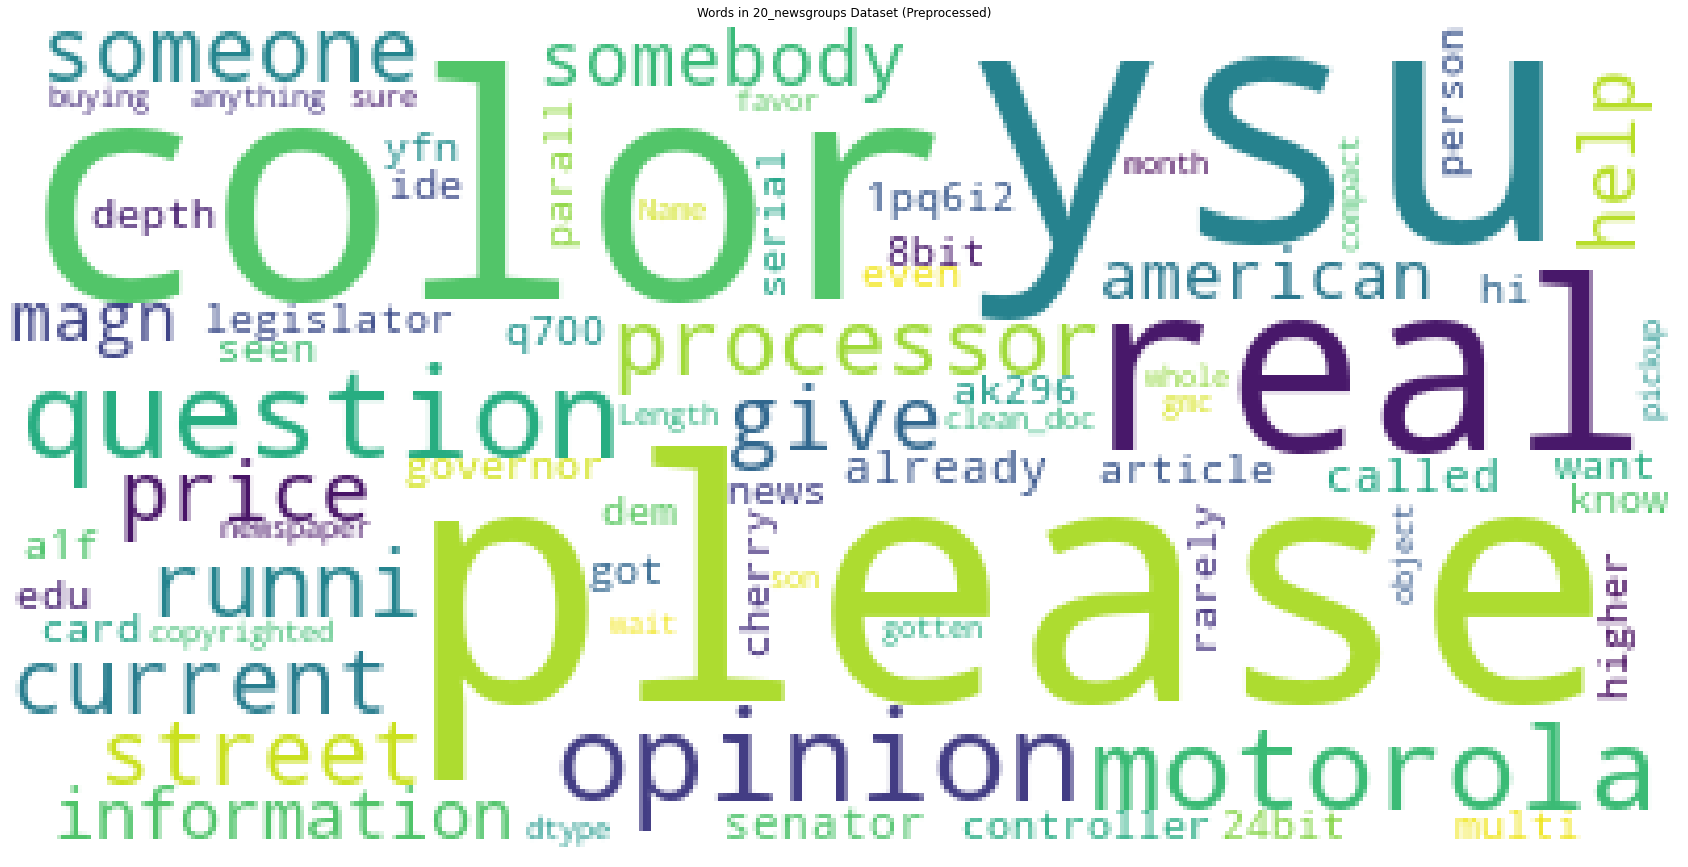

In [34]:
wordcloud = WordCloud(background_color='white', max_words=100).generate(str(dataframe['clean_doc']))
fig = plt.figure(figsize=[30,30])
plt.title('Words in 20_newsgroups Dataset (Preprocessed)')
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [27]:
# Tfidf the preprocessed data
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)
X = vectorizer.fit_transform(dataframe['clean_doc'])
X.shape

(11314, 1000)

In [38]:
# Topic modeling
svd_model = TruncatedSVD(n_components=20, random_state=12, n_iter=100, algorithm='randomized')
svd_model.fit(X)
terms = vectorizer.get_feature_names()
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print('Topic: {} \nWords: {}'.format(str(i), [w[0] for w in sorted_terms]))

Topic: 0 
Words: ['like', 'know', 'people', 'think', 'time', 'good', 'year', 'use', 'problem', 'thing']
Topic: 1 
Words: ['window', 'file', 'thanks', 'card', 'drive', 'driver', 'program', 'use', 'problem', 'disk']
Topic: 2 
Words: ['game', 'team', 'year', 'player', 'season', 'play', 'win', 'hockey', 'league', 'fan']
Topic: 3 
Words: ['window', 'game', 'god', 'file', 'team', 'player', 'win', 'program', 'jesus', 'thanks']
Topic: 4 
Words: ['drive', 'god', 'card', 'scsi', 'jesus', 'disk', 'christian', 'hard', 'controller', 'floppy']
Topic: 5 
Words: ['edu', 'thanks', 'mail', 'know', 'email', 'address', 'advance', 'com', 'send', 'looking']
Topic: 6 
Words: ['key', 'game', 'chip', 'god', 'drive', 'team', 'encryption', 'clipper', 'bit', 'disk']
Topic: 7 
Words: ['drive', 'file', 'edu', 'disk', 'people', 'armenian', 'israel', 'hard', 'year', 'gun']
Topic: 8 
Words: ['card', 'people', 'driver', 'video', 'armenian', 'monitor', 'israel', 'gun', 'right', 'israeli']
Topic: 9 
Words: ['edu', 'god',

In [35]:
pip install umap-learn


  Created wheel for umap-learn: filename=umap_learn-0.4.6-py3-none-any.whl size=67957 sha256=ba19073c3d4326960b491bcc0d3dcb7e8fb79f74d9ad8fc0bcbdbfe4a3a9e5f3
  Stored in directory: c:\users\jing\appdata\local\pip\cache\wheels\9c\18\d0\2bcf7df75d19c6ca6ff8097b12abd4c46879e9a8275e93e651
Successfully built umap-learn


In [36]:
import umap

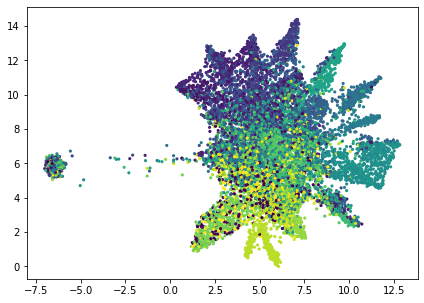

In [39]:
X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = data.target, s = 10, edgecolor='none')
plt.show()